# **Feature selection**

/tmp/ipython-input-2855201773.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_importances, y=feat_importances.index, palette='viridis')


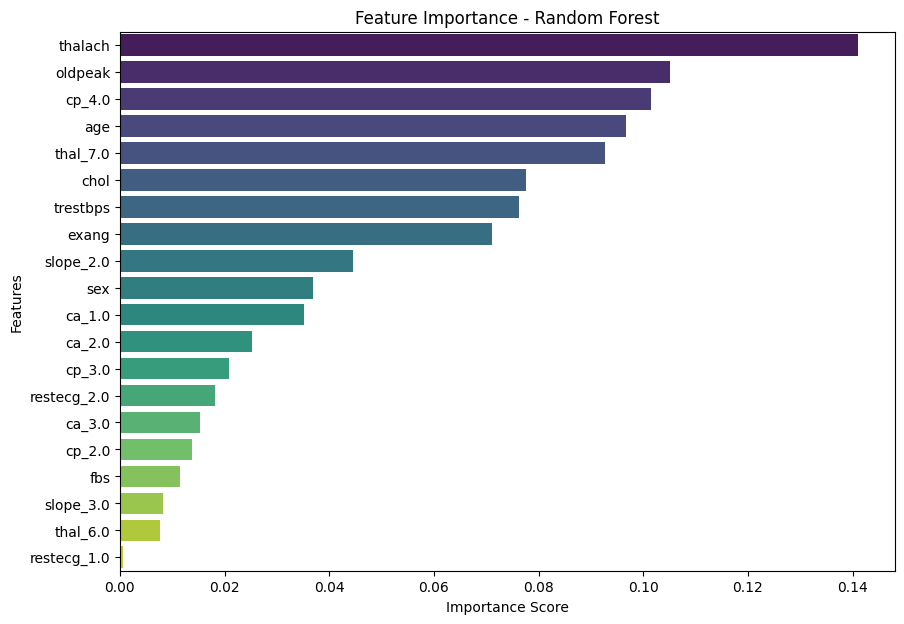

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

# Feature importance
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X_scaled.columns)
feat_importances = feat_importances.sort_values(ascending=False)

# plot
plt.figure(figsize=(10, 7))
sns.barplot(x=feat_importances, y=feat_importances.index, palette='viridis')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# **RFE Feature Selection**

In [ ]:
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=5)
rfe.fit(X_scaled, y)

selected_features = [f for f, s in zip(X_scaled.columns, rfe.support_) if s]
print("Selected Features by RFE:", selected_features)

Selected Features by RFE: ['age', 'chol', 'thalach', 'oldpeak', 'cp_4.0']


In [ ]:
kbd = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_binned = kbd.fit_transform(X_scaled)

chi_scores, p_values = chi2(X_binned, y)

chi_results = pd.DataFrame({'Feature': X_scaled.columns, 'Chi2': chi_scores, 'p-value': p_values})
chi_results = chi_results.sort_values(by='Chi2', ascending=False)
print(chi_results)

        Feature        Chi2       p-value
16     thal_7.0  171.833439  2.942642e-39
10       cp_4.0  169.640386  8.865641e-39
6         exang  152.210452  5.699416e-35
9        cp_3.0   86.204434  1.622634e-20
13    slope_2.0   82.496640  1.058499e-19
18       ca_2.0   78.039180  1.010169e-18
8        cp_2.0   62.585468  2.551291e-15
7       oldpeak   57.139532  4.059628e-14
17       ca_1.0   49.844666  1.664121e-12
19       ca_3.0   49.321293  2.172911e-12
1           sex   29.731382  4.962494e-08
12  restecg_2.0   15.951381  6.499036e-05
5       thalach   15.097546  1.020960e-04
15     thal_6.0   12.535883  3.992108e-04
0           age    6.298123  1.208659e-02
11  restecg_1.0    5.466266  1.938700e-02
14    slope_3.0    4.295566  3.821188e-02
2      trestbps    3.215230  7.295596e-02
4           fbs    0.658677  4.170274e-01
3          chol    0.469073  4.934138e-01


In [ ]:
final_features = selected_features
X_final = df_clean[final_features]